In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.cluster import KMeans

In [199]:
df = pd.read_csv('College_Data')

In [200]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


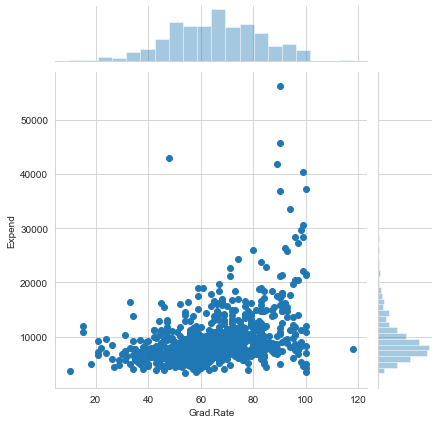

In [201]:
sns.jointplot(data=df, x='Grad.Rate', y= 'Expend')

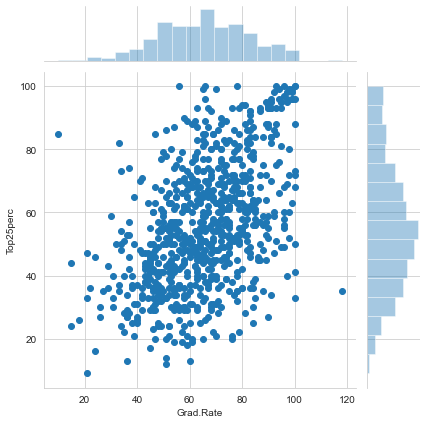

In [202]:
sns.jointplot(data=df, x='Grad.Rate', y= 'Top25perc')

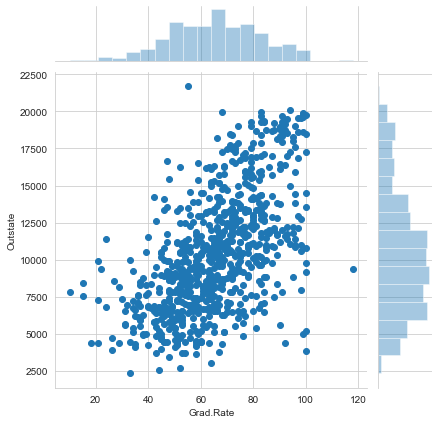

In [203]:
sns.jointplot(data=df, x='Grad.Rate', y= 'Outstate')

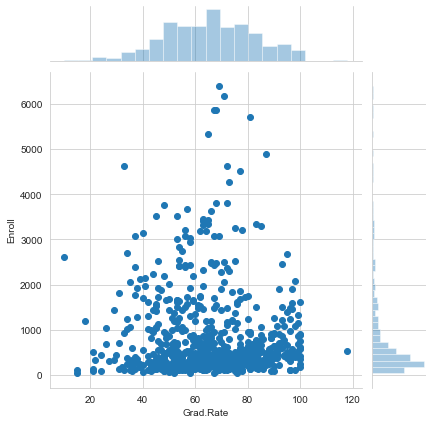

In [204]:
sns.jointplot(data=df, x='Grad.Rate', y= 'Enroll')

<AxesSubplot:xlabel='Grad.Rate', ylabel='Outstate'>

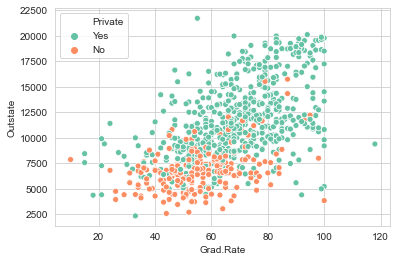

In [205]:
sns.scatterplot(data=df,x='Grad.Rate', y ='Outstate', hue = 'Private', palette='Set2')

<AxesSubplot:xlabel='F.Undergrad', ylabel='Outstate'>

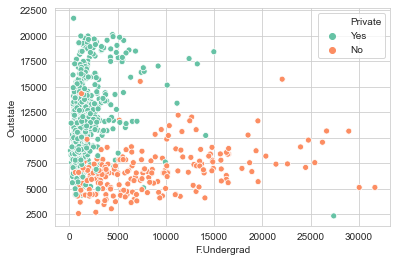

In [206]:
sns.scatterplot(data=df,x='F.Undergrad', y ='Outstate', hue = 'Private', palette='Set2')

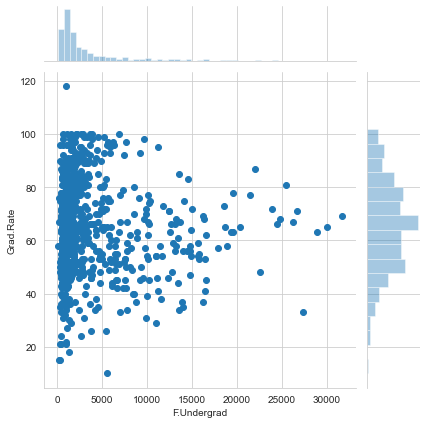

In [207]:
sns.jointplot(data=df, x='F.Undergrad', y= 'Grad.Rate')

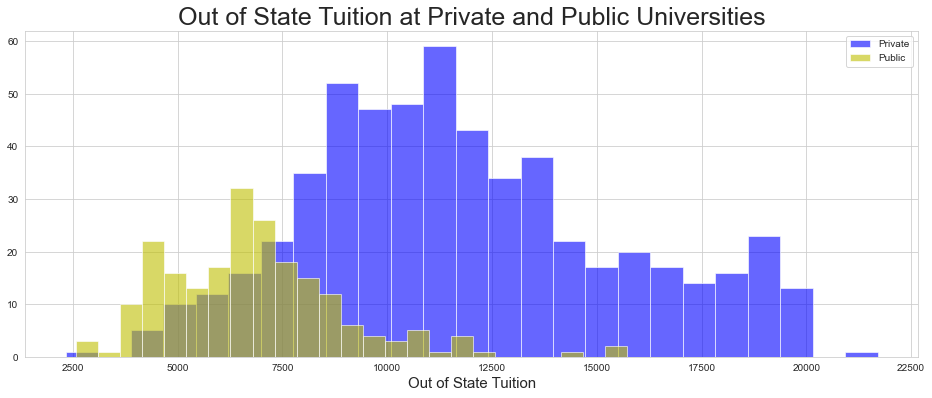

In [208]:
plt.figure(figsize=(16,6))
df[df['Private']=='Yes']['Outstate'].hist(bins=25, label = 'Private',color='blue', alpha=0.6)
df[df['Private']=='No']['Outstate'].hist(bins=25,label = 'Public',color='y',alpha=0.6)
plt.title('Out of State Tuition at Private and Public Universities', size=25)
plt.xlabel('Out of State Tuition',size=15)
plt.legend()

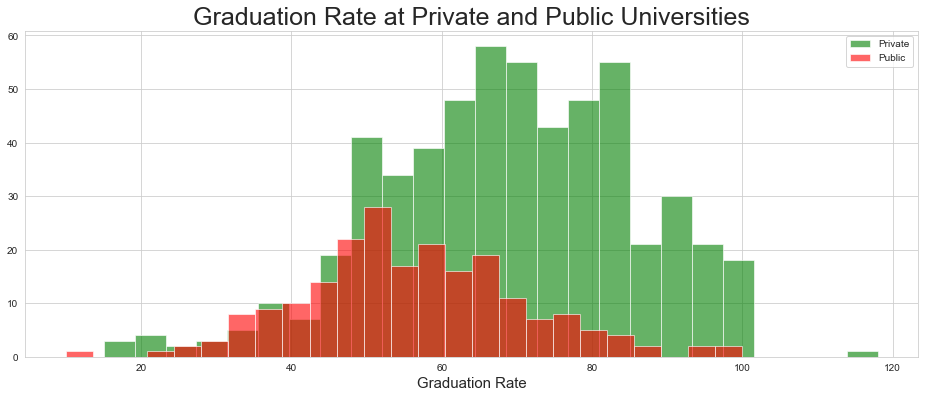

In [209]:
plt.figure(figsize=(16,6))
df[df['Private']=='Yes']['Grad.Rate'].hist(bins=25, label = 'Private',color='green', alpha=0.6)
df[df['Private']=='No']['Grad.Rate'].hist(bins=25,label = 'Public',color='r',alpha=0.6)
plt.title('Graduation Rate at Private and Public Universities', size=25)
plt.xlabel('Graduation Rate',size=15)
plt.legend()

In [210]:
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [211]:
df.loc[95,'Grad.Rate']=100

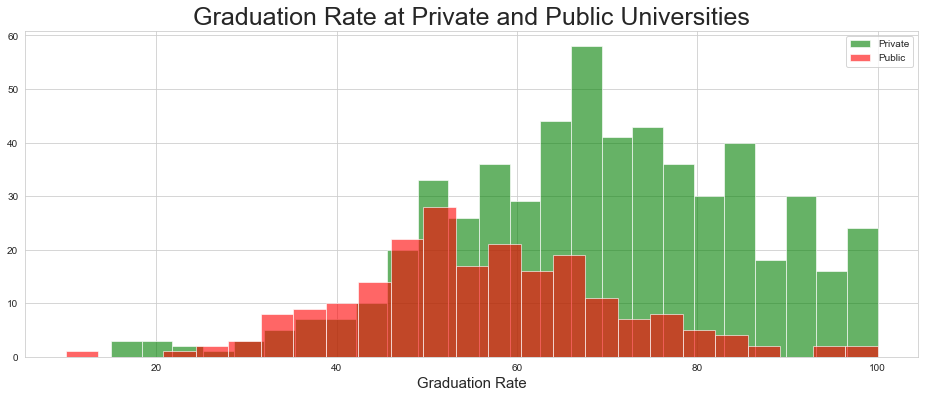

In [212]:
plt.figure(figsize=(16,6))
df[df['Private']=='Yes']['Grad.Rate'].hist(bins=25, label = 'Private',color='green', alpha=0.6)
df[df['Private']=='No']['Grad.Rate'].hist(bins=25,label = 'Public',color='r',alpha=0.6)
plt.title('Graduation Rate at Private and Public Universities', size=25)
plt.xlabel('Graduation Rate',size=15)
plt.legend()

### Create the K-means clustering model

In [213]:
model = KMeans(n_clusters=2)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to Cazenovia College
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    float64
 3   Accept       777 non-null    float64
 4   Enroll       777 non-null    float64
 5   Top10perc    777 non-null    float64
 6   Top25perc    777 non-null    float64
 7   F.Undergrad  777 non-null    float64
 8   P.Undergrad  777 non-null    float64
 9   Outstate     777 non-null    float64
 10  Room.Board   777 non-null    float64
 11  Books        777 non-null    float64
 12  Personal     777 non-null    float64
 13  PhD          777 non-null    float64
 14  Terminal     777 non-null    float64
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    float64
 17  Expend       777 non-null    float64
 18  Grad.Rate    778 non-null    float64
dtyp

In [215]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [217]:
model.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

In [218]:
model.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

### Evaluation since we have the actual lables for the cluster in the private column

In [221]:
def converted(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [224]:
df['Cluster'] = df['Private'].apply(converted)

In [226]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],model.labels_))
print(classification_report(df['Cluster'],model.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

